In [114]:
# This directive tells the notebook to add interactive plots in the notebook
%matplotlib notebook

from forced_barotropic_sphere.sphere import Sphere #bm3_barotropic_model packages
from forced_barotropic_sphere.solver import Solver
from forced_barotropic_sphere.forcing import Forcing
import forced_barotropic_sphere.plotting as plotters
import forced_barotropic_sphere.ensemble_methods as ensemble_methods
import matplotlib.path as mpath

import time
import numpy as np
import random
import xarray as xr

import cartopy as crt             # Map projection stuff
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib as mpl          # Plotting routines
import matplotlib.pyplot as plt    
import matplotlib.animation as manim
import matplotlib.ticker as mticker

from tqdm import tqdm

from IPython.display import display, clear_output, HTML, FileLink  # Some technical stuff, used to display animation

In [115]:
##physical constants
s2d = 1/3600/24    # seconds to days
s2h = 1/3600       # seconds to hours
a = 6371e3         # Radius of the earth in m
g00 = 9.81         # Acceleration due to gravity near the surface of the earth in m/s^2
R = 287.           # Dry gas constant in J/K/kg
d2r = np.pi / 180. # Factor to convert degrees to radians
r2d = 180. / np.pi # Factor to convert radians to degrees


integrating for 20.8 days with a dt of 0.83 hours
output freq of 5.00 hours


<IPython.core.display.Javascript object>


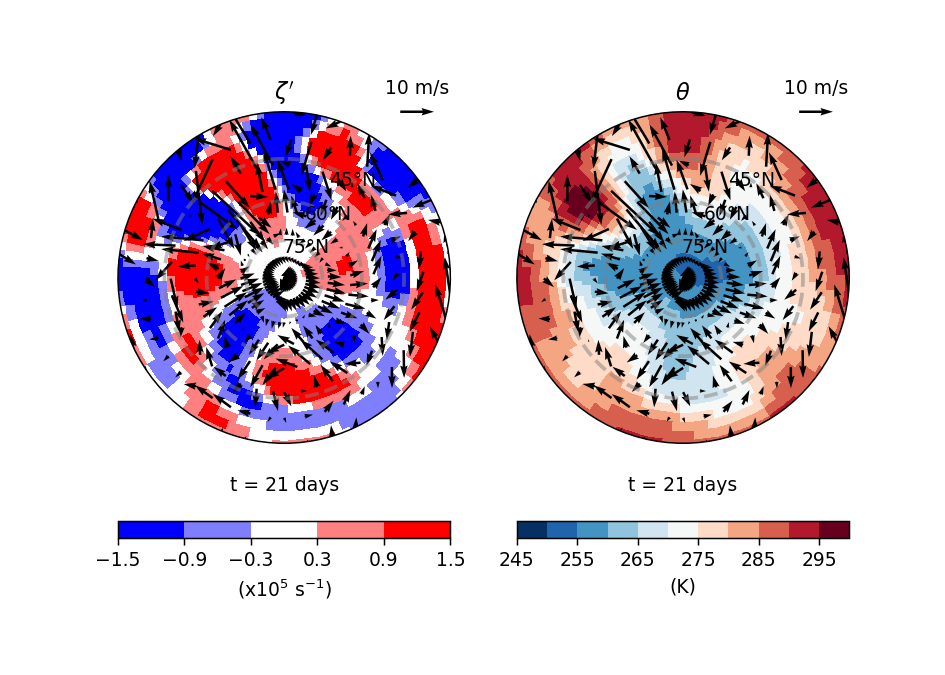

In [116]:
dt = 3000 #time between integration steps (seconds)
Nt = 600 #number of integration steps
T= Nt*dt #total integration time
print('integrating for {:.1f} days with a dt of {:.2f} hours'.format(T*s2d,dt*s2h))

ofreq = 6 #frequency of integration output in resulting ds
print('output freq of {:.2f} hours'.format(dt*s2h*ofreq))

nlat=64; nlon=128 #T42 resolution
#nlat*=2;nlon*=2
st = Sphere(nlat,nlon)
F = Forcing(st,dt,T)
Si = F.generate_rededdy_start() #initial forcing
forcing_tseries = F.generate_rededdy_tseries(A=8e-12,Si=Si) #evolve forcing

k0=6 #if we want to start with some structure in the vorticity here's an option
vortp = 10e-5 * np.exp( -0.5 * (st.glats - 20.)**2 / 10**2 ) * np.cos(k0 * st.rlons)

thetap = np.zeros(vortp.shape) #we'll start with t0=background state
vortp = np.zeros(thetap.shape)
ics = np.array([vortp,thetap])

#choose whether we integrate with a linear temp/vorticity field. temp_linear=False uses nonlinear advection
sln = Solver(st, forcing=F, ofreq=ofreq).integrate_dynamics(temp_linear=True, vort_linear=True)
tidx=int(Nt/ofreq)-1
f,ax = plotters.plot_overview(sln.isel(time=tidx),
            levels=[np.linspace(-1.5,1.5,6),np.arange(245,305,5)], perturbation=[True,False])
#f.savefig('./images/L18_singlerun.png',dpi=300, bbox_inches='tight')

In [122]:
dsr = sln.rename(dict(x='lon',y='lat'))
# Reassign longitude coordinates between -180 and 180E
dsr = dsr.assign_coords(lon=(((dsr.lon + 180) % 360) - 180))
dsr = dsr.sortby('lon')

#x0 = [(-100., l) for l in np.linspace(45, 65, 3)] #initial position of parcel
x0= [(-100., 50) ]
ts, xs = calculate_trajectories(dsr, x0, t0 = float(T), rvs=True)

#plot_quiver(dsr,t=T,trjs=xs)

[1800000.] [      0.    3600.    7200.   10800.   14400.   18000.   21600.   25200.
   28800.   32400.   36000.   39600.   43200.   46800.   50400.   54000.
   57600.   61200.   64800.   68400.   72000.   75600.   79200.   82800.
   86400.   90000.   93600.   97200.  100800.  104400.  108000.  111600.
  115200.  118800.  122400.  126000.  129600.  133200.  136800.  140400.
  144000.  147600.  151200.  154800.  158400.  162000.  165600.  169200.
  172800.  176400.  180000.  183600.  187200.  190800.  194400.  198000.
  201600.  205200.  208800.  212400.  216000.  219600.  223200.  226800.
  230400.  234000.  237600.  241200.  244800.  248400.  252000.  255600.
  259200.  262800.  266400.  270000.  273600.  277200.  280800.  284400.
  288000.  291600.  295200.  298800.  302400.  306000.  309600.  313200.
  316800.  320400.  324000.  327600.  331200.  334800.  338400.  342000.
  345600.  349200.  352800.  356400.  360000.  363600.  367200.  370800.
  374400.  378000.  381600.  385200.  38

  0%|                                           | 1/499 [00:00<01:14,  6.66it/s]

[1800000.]
[1796400.]


  1%|▎                                          | 3/499 [00:00<01:03,  7.79it/s]

[1792800.]
[1789200.]


  1%|▍                                          | 5/499 [00:00<01:01,  8.07it/s]

[1785600.]
[1782000.]


  1%|▌                                          | 7/499 [00:00<00:53,  9.18it/s]

[1778400.]
[1774800.]
[1771200.]


  2%|▉                                         | 11/499 [00:01<00:47, 10.26it/s]

[1767600.]
[1764000.]
[1760400.]


  3%|█                                         | 13/499 [00:01<00:46, 10.52it/s]

[1756800.]
[1753200.]
[1749600.]


  3%|█▍                                        | 17/499 [00:01<00:44, 10.80it/s]

[1746000.]
[1742400.]
[1738800.]


  4%|█▌                                        | 19/499 [00:01<00:44, 10.85it/s]

[1735200.]
[1731600.]
[1728000.]


  5%|█▉                                        | 23/499 [00:02<00:43, 10.94it/s]

[1724400.]
[1720800.]
[1717200.]


  5%|██                                        | 25/499 [00:02<00:43, 10.90it/s]

[1713600.]
[1710000.]
[1706400.]


  6%|██▍                                       | 29/499 [00:02<00:42, 10.97it/s]

[1702800.]
[1699200.]
[1695600.]


  6%|██▌                                       | 31/499 [00:03<00:42, 10.97it/s]

[1692000.]
[1688400.]
[1684800.]


  7%|██▉                                       | 35/499 [00:03<00:42, 11.00it/s]

[1681200.]
[1677600.]
[1674000.]


  7%|███                                       | 37/499 [00:03<00:41, 11.00it/s]

[1670400.]
[1666800.]
[1663200.]


  8%|███▍                                      | 41/499 [00:03<00:41, 11.02it/s]

[1659600.]
[1656000.]
[1652400.]


  9%|███▌                                      | 43/499 [00:04<00:41, 11.02it/s]

[1648800.]
[1645200.]
[1641600.]


  9%|███▉                                      | 47/499 [00:04<00:40, 11.03it/s]

[1638000.]
[1634400.]
[1630800.]


 10%|████                                      | 49/499 [00:04<00:40, 11.01it/s]

[1627200.]
[1623600.]
[1620000.]


 11%|████▍                                     | 53/499 [00:05<00:40, 11.01it/s]

[1616400.]
[1612800.]
[1609200.]


 11%|████▋                                     | 55/499 [00:05<00:40, 11.01it/s]

[1605600.]
[1602000.]
[1598400.]


 12%|████▉                                     | 58/499 [00:05<00:41, 10.55it/s]


[1594800.]
[1591200.]



KeyboardInterrupt



In [35]:
# This cell defines a single function, but does not run it. You can see examples of 
# how it is used in the next cell. Various parts of this function are commented out;
# if you want to add more details to the plot or more functionality to the routine, try
# uncommenting some of the commented out code.
def plot_quiver(ds, t = None, skip=10, trjs=None):#, lats=(-90, 90), lons = (-180, 180)):
    '''Plots horizontal winds at one timestep. The one required argument is the
    xarray dataset containg variables ``u`` and ``v``. The argument ``t`` is optional - 
    if you simply write plot_quiver(ds), the function will plot the first 
    time step in the dataset. See if you can work out what ``skip`` does.'''
    
    # If no t is specified, use first date for which we have wind data
    if t is None: t = np.datetime64(ds.time.data[0], 'D')
    
    # These lines copy the coordinates and components of the wind vectors
    x = ds.lon.data[::skip]
    y = ds.lat.data[::skip]
    u = ds.u.sel(time=t).data[::skip, ::skip]
    v = ds.v.sel(time=t).data[::skip, ::skip]
    
    plt.ioff()  # Turn off interactive plotting (while we build the plot)

    # Create a new figure, 5" by 3.5"
    f = plt.figure(figsize = (5, 3.5), dpi = 150)
    f.clf() # Clear the contents of the figure

    # Create a new panel for geographic data, using a simple map projection
    ax = plt.subplot(1, 1, 1, projection = ccrs.PlateCarree())
        
    ###########################
    ###########################
    # These lines plot the 'Montgomery potential' - also known
    # as the 'Montgomery streamfunction' or the 'dry static energy.'
    # We will talk about this a bit in coming weeks, but you can
    # simply think of it as equivalent to the pressure in the geometric
    # coordinates that we've been using so far.
    
    #clevs = np.linspace(299000, 319000, 41)
    #ds.mont.sel(time=t).squeeze().plot.contour(ax=ax, levels = clevs, colors='k')

    # Add oceans to the plot
    ax.add_feature(crt.feature.OCEAN)
    
    # Add quivers showing the wind vectors at each grid point
    ax.quiver(x, y, u, v, transform = ccrs.PlateCarree(), \
              color = '0.2', units='inches', scale=250., width=0.01, pivot='mid')
    
#     title = 'Winds on %d K isentrope, %s' % (
#             ds.level,
#             t.astype(datetime.datetime).strftime('%HZ, %d %h %Y'))
    
    # Set the plot title
    #ax.set_title(title, fontsize=9)
    
    ###########################
    ###########################
    # The following two lines change the domain of the plot
    # They depend on the arguments ``lons`` and ``lats`` 
    # (uncomment these in the function definition)
    
    #ax.set_xlim(lons[0], lons[1])
    ax.set_ylim(30, 90)
    
    ###########################
    ###########################
    # The following commented block adds meridians and parallels to the
    # plot. 
    
    #gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
    #              linewidth=1, color='black', alpha = 0.5, linestyle='--')
    #gl.xlabels_top = False
    #gl.ylabels_right = False
    #gl.xlocator = mticker.FixedLocator(range(-180, 180, 30))
    #gl.xformatter = LONGITUDE_FORMATTER
    #gl.ylocator = mticker.FixedLocator(range(-90, 90, 30))
    #gl.yformatter = LATITUDE_FORMATTER
    #gl.xlabel_style = dict(size = 7)
    #gl.ylabel_style = dict(size = 7)
    
    ###########################
    ###########################
    # Add trajectories
    
    if trjs is not None:
        ntr = trjs.shape[2]
        for i in range(ntr):
            ax.plot(trjs[:, 0, i], trjs[:, 1, i], 'r', lw=2.)
            ax.plot(trjs[0:1, 0, i], trjs[0:1, 1, i], 'kx', ls='', mew=2.)
            ax.plot(trjs[7::8, 0, i], trjs[7::8, 1, i], 'k+', ls='', mew=1.)
            
    # Turn on interactive plotting now that the plot is complete
    plt.ion()

    # Display and update the plot
    plt.show()
    plt.draw()

In [110]:
rts, rxs=calculate_rvstrajectories(dsr, x0=[tuple(xs[-1,:,i]) for i in range(xs.shape[2])],t0=ts[-1][0])

Integrating 3 trajectories for [20.79166667].
  1. From 73.2561 E, 43.0289 N at 1796400.0.
  2. From 71.1674 E, 61.3154 N at 1796400.0.
  3. From 7.40526 E, 60.4026 N at 1796400.0.


100%|█████████████████████████████████████████| 498/498 [00:45<00:00, 11.06it/s]

Completed 499 of 499 timesteps.


<IPython.core.display.Javascript object>


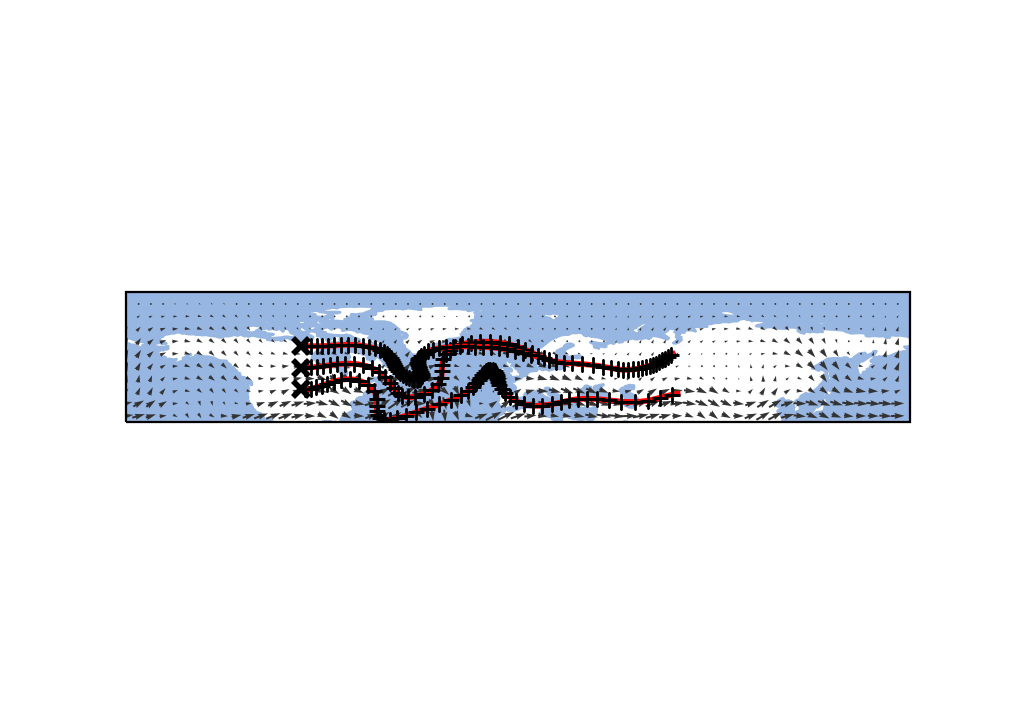

<IPython.core.display.Javascript object>


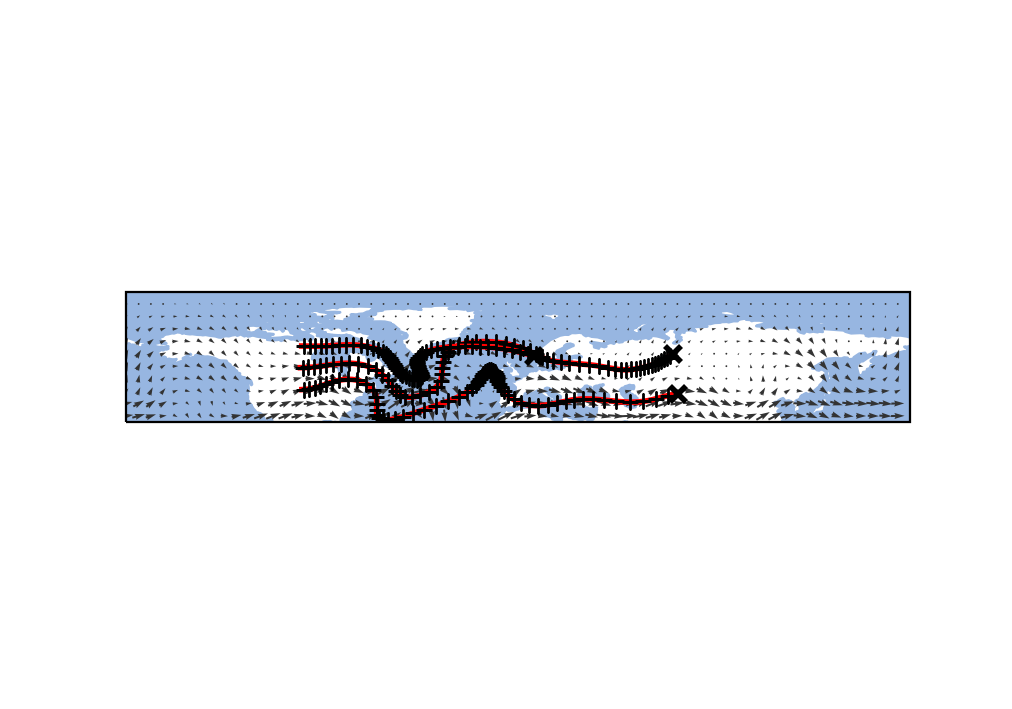

In [112]:
plot_quiver(dsr, t=T, skip=2, trjs=xs)
plot_quiver(dsr, t=T, skip=2, trjs=rxs)

In [106]:
print(xs.shape)
[tuple(xs[-1,:,i]) for i in range(xs.shape[2])]
#list(map(tuple, xs[-1,:,:]))

(500, 2, 3)


[(73.25608479110298, 43.028936337504085),
 (71.16740432071094, 61.3153856929065),
 (7.405261771129403, 60.4026469812916)]

In [108]:
xs[-1,0,:]

array([73.25608479, 71.16740432,  7.40526177])

1800000